In [1]:
## Baixando as bibliotecas

import torch
from torch import nn, optim

import matplotlib.pyplot as plt

from torchvision import datasets
from torchvision import transforms

from torch.utils.data import DataLoader

import numpy as np

## definindo um dicionario de hiperparametros e também o device(gpu/cpu)

In [2]:
args = {    
    'batch_size' : 20,
    'num_workers' : 4,
    'lr' : 1e-4,
    'weight_decay' : 5e-4,
    'num_epochs' : 30
}

if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
    
else:
    args['device'] = torch.device('cpu')
    
print(args['device'])

cuda


## baixano o dataset do MNIST

In [3]:
train_set = datasets.MNIST('./',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True) 

test_set = datasets.MNIST('./',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=False)

print('Quantidade de amostras de treino é: {}.'.format(str(len(train_set))))
print('Quantidade de amostras de teste é: {}.'.format(str(len(test_set))))

Quantidade de amostras de treino é: 60000.
Quantidade de amostras de teste é: 10000.


In [4]:
print(type(train_set))
print(type(train_set[0]))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>


## visualizando o dataset

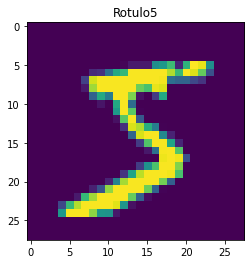

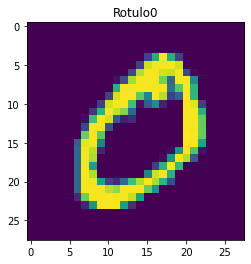

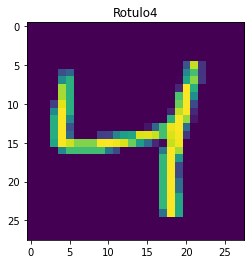

In [5]:
for i in range(3):
    dado, rotulo = train_set[i]
    
    plt.figure()
    plt.imshow(dado[0])
    plt.title('Rotulo' + str(rotulo))

# implementando o test loader e train loader

In [6]:
train_loader = DataLoader(train_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

## visualizando os loaders

torch.Size([20, 1, 28, 28]) torch.Size([20])


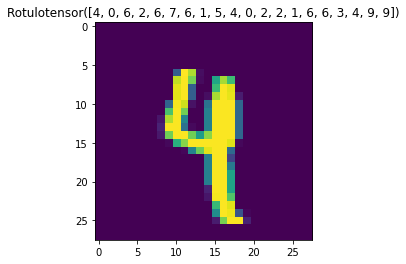

In [7]:
for batch in train_loader:
    
    dado, rotulo = batch
    print(dado.size(), rotulo.size())
    
    plt.figure()
    plt.imshow(dado[0][0])
    plt.title('Rotulo' + str(rotulo))
    
    break

# implementando o MLP

In [8]:
## definindo os parametros
input_size  = 28 * 28  ## torch.Size([20, 1, 28, 28]) (tamanho da imagem é 28*28)
hidden_size = 128
out_size = 10  ## número da classes

# fazendo a class nn.Module
class MLP(nn.Module):
    
    def __init__(self, input_size, hidden_size, out_size):
        super(MLP, self).__init__()
        
        self.features  = nn.Sequential(
                         nn.Linear(input_size, hidden_size),
                         nn.ReLU(),
                         nn.Linear(hidden_size, hidden_size),
                         nn.ReLU()
                         )
            
        self.out     = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()
        
    def forward(self, X):
        
        X = X.view(X.size(0), -1) ## redimencionando o X e o -1 para linearizar o restante
        
        feature = self.features(X)
        output = self.softmax(self.out(feature))
        
        
        return output
    

## jogando os dados na GPU
net = MLP(input_size, hidden_size, out_size).to(args['device'])  ## cast na GPU
print(net)

MLP(
  (features): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
  )
  (out): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


## definindo o loss e o otimizador

In [9]:
criterion =nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

## fluxo de treinamento 

In [10]:
for epoch in range(args['num_epochs']):
    
    
    epoch_loss = []
    
    for batch in train_loader:
        
        dado, rotulo = batch
        
        # Cast GPU
        dado   = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])
        
        # Forward
        
        predic = net(dado)
        loss = criterion(predic, rotulo)
        epoch_loss.append(loss.cpu().data)
        
        # Backward
        
        loss.backward()
        optimizer.step()
        
    epoch_loss = np.asarray(epoch_loss)
    
    print('Epoca {}, Loss {:.4f} +/- {:.4f}'.format(epoch, epoch_loss.mean(), epoch_loss.std()))
    

<ipython-input-8-5272ca50d86b>:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.out(feature))


Epoca 0, Loss 1.6731 +/- 0.1702
Epoca 1, Loss 1.6151 +/- 0.0816
Epoca 2, Loss 1.7003 +/- 0.1132
Epoca 3, Loss 1.8133 +/- 0.1083
Epoca 4, Loss 1.8203 +/- 0.1086
Epoca 5, Loss 1.7586 +/- 0.1017
Epoca 6, Loss 1.8161 +/- 0.1105
Epoca 7, Loss 1.8703 +/- 0.1092
Epoca 8, Loss 1.8856 +/- 0.1100
Epoca 9, Loss 1.8950 +/- 0.1107
Epoca 10, Loss 1.8658 +/- 0.1097
Epoca 11, Loss 1.8549 +/- 0.1114
Epoca 12, Loss 1.8508 +/- 0.1101
Epoca 13, Loss 1.8556 +/- 0.1079
Epoca 14, Loss 1.8842 +/- 0.1094
Epoca 15, Loss 1.9175 +/- 0.1129
Epoca 16, Loss 1.9541 +/- 0.1125
Epoca 17, Loss 1.9835 +/- 0.1128
Epoca 18, Loss 1.9991 +/- 0.1134
Epoca 19, Loss 2.0093 +/- 0.1118
Epoca 20, Loss 2.0288 +/- 0.1107
Epoca 21, Loss 2.0506 +/- 0.1104
Epoca 22, Loss 2.1160 +/- 0.1109
Epoca 23, Loss 2.1551 +/- 0.1043
Epoca 24, Loss 2.1696 +/- 0.1010
Epoca 25, Loss 2.1765 +/- 0.1011
Epoca 26, Loss 2.1795 +/- 0.1005
Epoca 27, Loss 2.1832 +/- 0.1006
Epoca 28, Loss 2.1931 +/- 0.0997
Epoca 29, Loss 2.2033 +/- 0.0987
